In [12]:


import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.compose import make_column_transformer

In [47]:
data = pd.read_csv("demographic_health_data.csv")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [15]:
data.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [11]:
# 
df = pd.read_csv("data_dict.csv", encoding='windows-1252') # This is the second data set.
df.head()

,Feature,Unnamed: 1,Unnamed: 2
0,fips,FIPS Code for the County,NaN
1,TOT_POP,Total Population,This data as well as all Age and Race data is ...
2,0-9,Population aged 0-9,All of the other age columns are the same but ...
3,0-9 y/o % of total pop,% of the population aged 0-9,NaN
4,10-19',NaN,NaN


***EDA***

In [ ]:
# For the EDA im just going to look at some plots of different column.
data.applymap(lambda x: isinstance(x, (int, float))) # This command allows me to explore the datatypes in the Dataframesdata.

/tmp/ipykernel_4573/2896566587.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.applymap(lambda x: isinstance(x, (int, float)))


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3136,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3137,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3138,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [19]:
data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

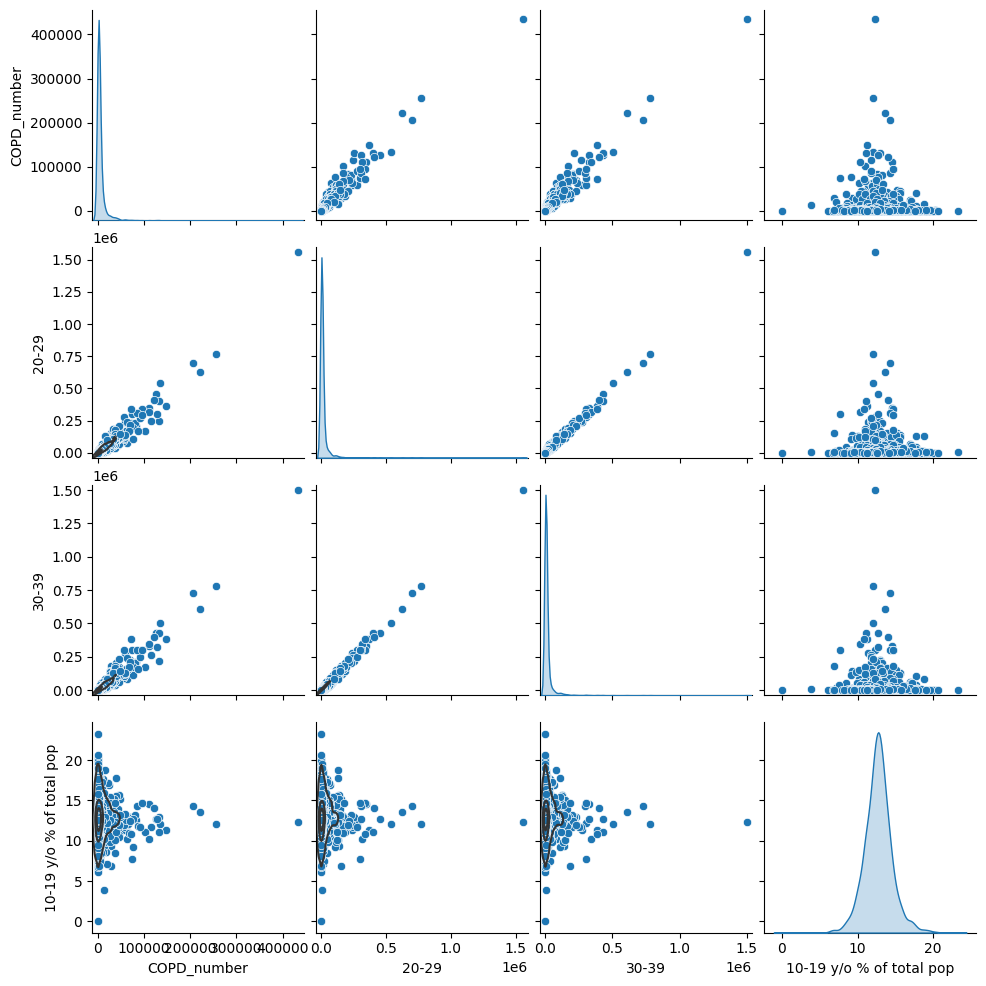

In [25]:
COPD_age_ = data[["COPD_number","20-29","30-39","10-19 y/o % of total pop"]]
g = sns.pairplot(COPD_age_,diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

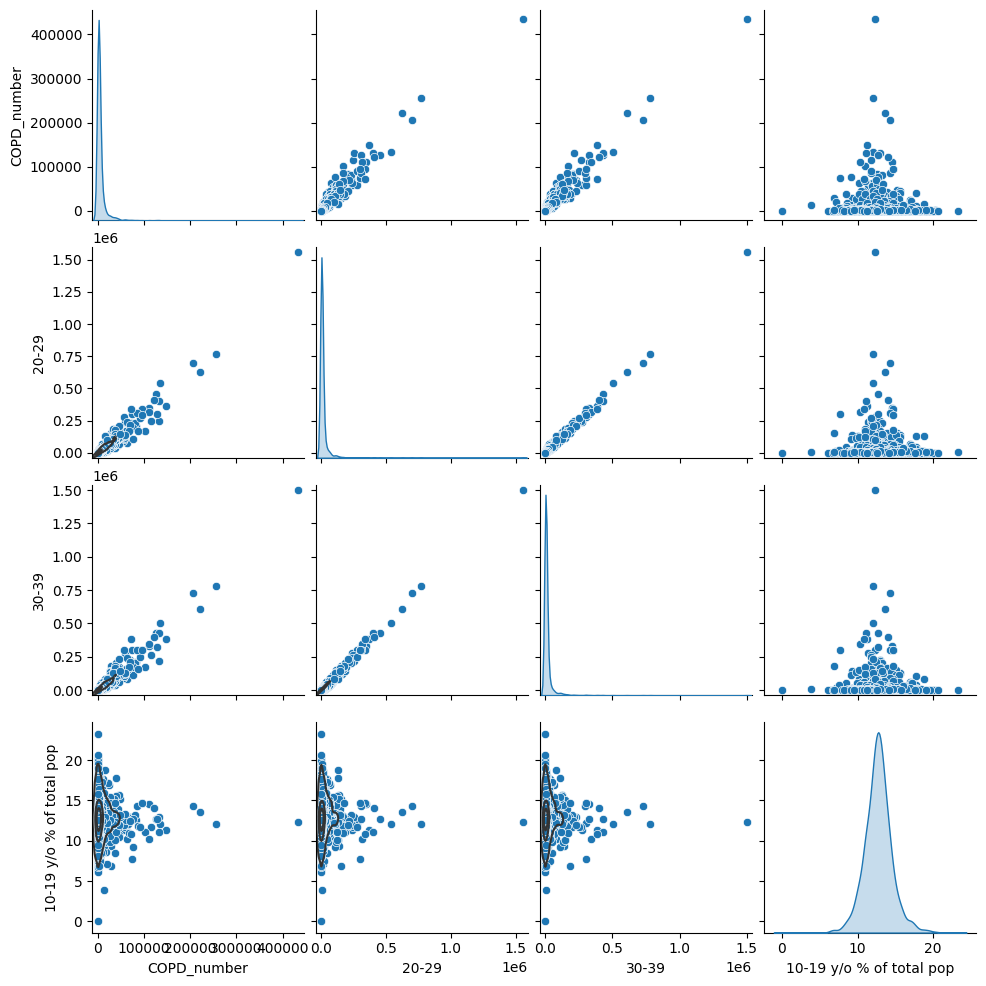

In [26]:
DIABETES_age_ = data[["diabetes_number","20-29","30-39","10-19 y/o % of total pop"]]
g2 = sns.pairplot(COPD_age_,diag_kind="kde")
g2.map_lower(sns.kdeplot, levels=4, color=".2")

***Data Preprcessing***

In [28]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
print(data.columns)

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)


In [61]:
X = data.drop(['COPD_number'],axis=1)
y = data['COPD_number']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,train_size=0.8)
features = data.drop(["COPD_number","COUNTY_NAME","STATE_NAME"],axis=1).columns


t = make_column_transformer(
    (MinMaxScaler(),features),
     (OneHotEncoder(handle_unknown='ignore'),["COUNTY_NAME","STATE_NAME"]) # get all values between 0 and 1
   )


t.fit(X_train)
X_train2_normal = t.transform(X_train)
X_test_2normal = t.transform(X_test)


In [62]:
model1 = LinearRegression()
model1.fit(X_train2_normal,y_train)


LinearRegression()

In [68]:
y_predict = model1.predict(X_test_2normal)
y_predict;

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_predict)}")
print(f"Coefficient of determination: {r2_score(y_test, y_predict)}")

Mean squared error: 2198664.0084275687
Coefficient of determination: 0.9950288722511872


In [70]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train2_normal, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test_2normal, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [  -0.           -0.           -0.         ...  354.67758984 -358.69815738
   -0.        ]
R2 score: 0.9969870859813279


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335873703.0530369, tolerance: 49759232.46796673
  model = cd_fast.sparse_enet_coordinate_descent(
